## Observations and Insights 

In [165]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(study_results,mouse_metadata, how = 'left', on= "Mouse ID")
study_data.head(12)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [22]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [23]:
len(study_data)

1893

In [24]:
# Checking the number of mice in the DataFrame.
mice_count = study_data['Mouse ID'].nunique()
mice_count

249

In [25]:
study_data['Mouse ID'].value_counts()

g989    13
a963    10
g288    10
h246    10
l471    10
        ..
b447     1
h428     1
d133     1
o848     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_data_clean = study_data.drop_duplicates(['Mouse ID','Timepoint'])
study_data_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

avg_tumor = study_data_clean.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
avg_tumor 

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [28]:
median_tumor = study_data_clean.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
median_tumor

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [29]:
var_tumor = study_data_clean.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
var_tumor

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [30]:
stDev_tumor = study_data_clean.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
stDev_tumor

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [44]:
sem_tumor = study_data_clean.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
sem_tumor

# def SEMCalc (treatment):
#         mask = study_data_clean['Drug Regimen'] == treatment
#         sem_data = study_data_clean.loc[mask]
#         drug_sem = st.sem(sem_data['Tumor Volume (mm3)'])
#     #capomulin_timept.plot(kind = "bar")

# for treatment in study_data_clean['Drug Regimen'].unique(): 
#     SEMs = SEMCalc(treatment)
#     SEMs

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [45]:
drug_summary = pd.concat([avg_tumor,median_tumor,var_tumor,stDev_tumor,sem_tumor], axis = 1)
drug_summary.columns = ['Average Tumor Volume', 'Median Tumor Volume', 'Variance of Tumor Volume', 
                        'Standard Deviation of Tumor Volume', 'Standard Error of Tumor Volume']
drug_summary

,Average Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard Error of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

## Bar Plots

In [34]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

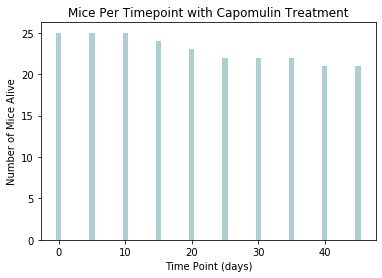

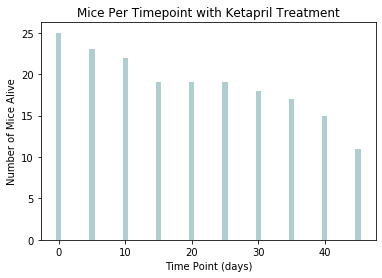

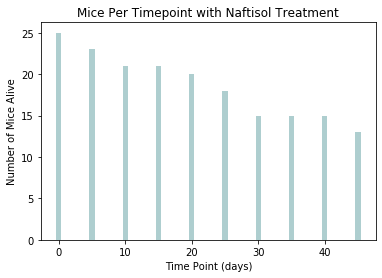

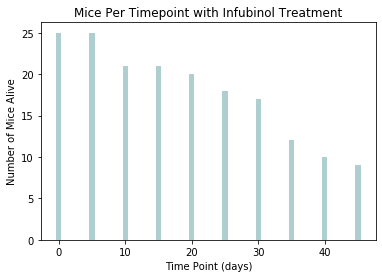

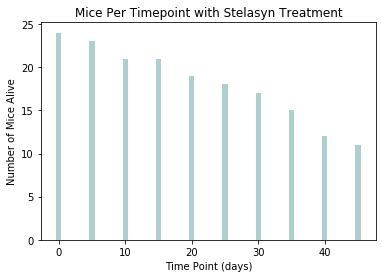

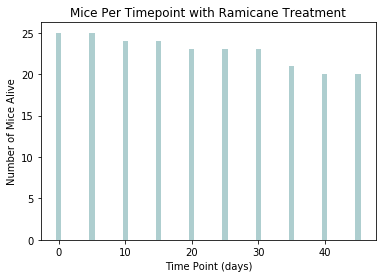

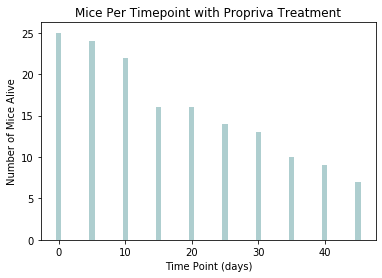

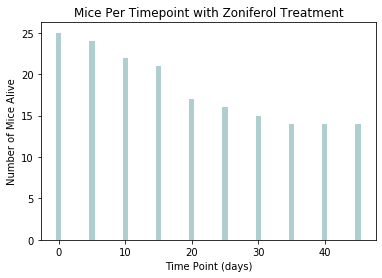

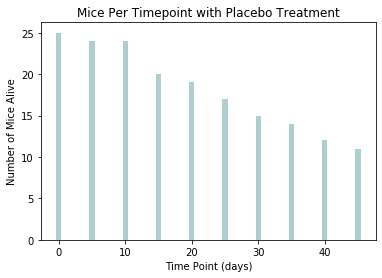

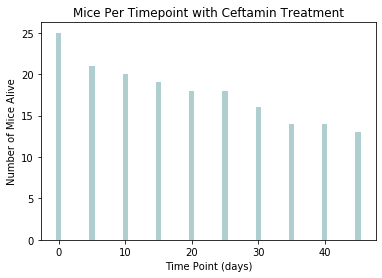

In [35]:
#find the data for Capomulin over each time point and then plot onto bar graph THEN generalize it into a function

def MiceBar(treatment):
        mask = study_data_clean['Drug Regimen'] == treatment
        drug_data = study_data_clean.loc[mask]
        drug_timept = drug_data.Timepoint.value_counts().sort_values(ascending = False)
    #capomulin_timept.plot(kind = "bar")

        x_axis = drug_timept.index
        y_values = drug_timept.values
        plt.bar(x_axis, y_values, color='cadetblue', alpha=0.5, align="center")
        plt.title(f"Mice Per Timepoint with {treatment} Treatment")
        plt.xlabel("Time Point (days)")
        plt.ylabel("Number of Mice Alive")

for treatment in study_data_clean['Drug Regimen'].unique(): 
    MiceBar(treatment)
    plt.show()

## Pie Plots

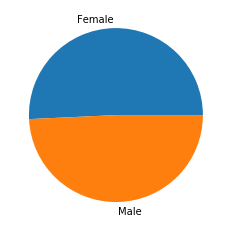

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_labels = study_data_clean.Sex.unique()
sex_values = study_data_clean.Sex.value_counts()
plt.pie(sex_values, labels = sex_labels)
plt.show()

## Quartiles, Outliers and Boxplots

In [61]:
drug_list = pd.DataFrame(study_data_clean['Drug Regimen'].unique())
drug_list.append(max_val)

,0
0,Capomulin
1,Ketapril
2,Naftisol
3,Infubinol
4,Stelasyn
5,Ramicane
6,Propriva
7,Zoniferol
8,Placebo
9,Ceftamin


In [112]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. \


def TumorFinal(treatment):
    mask = study_data_clean['Drug Regimen'] == treatment
    drug_data2 = study_data_clean.loc[mask]
    tumor_size = drug_data2['Tumor Volume (mm3)'].max()
    return [[treatment, tumor_size]]


max_val = []
for treatment in study_data_clean['Drug Regimen'].unique(): 
    max_val += TumorFinal(treatment)

In [122]:
max_val



[['Capomulin', 48.15820939],
 ['Ketapril', 78.56701362],
 ['Naftisol', 76.66881742],
 ['Infubinol', 72.2267309],
 ['Stelasyn', 75.12368955],
 ['Ramicane', 47.62281636],
 ['Propriva', 72.45542116],
 ['Zoniferol', 73.32443228],
 ['Placebo', 73.21293851],
 ['Ceftamin', 68.92318457]]

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

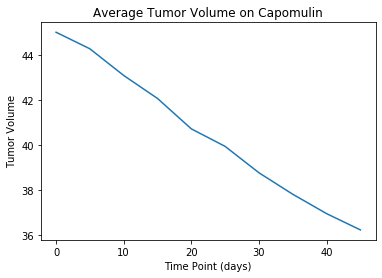

In [134]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

tumor_time = study_data_clean.loc[study_data_clean['Drug Regimen'] == 
                     'Capomulin'].groupby('Timepoint').mean()['Tumor Volume (mm3)']

#is this supposed to be a specific mouse, or just an average?
plt.plot(tumor_time.index,tumor_time.values)
plt.title("Average Tumor Volume on Capomulin")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [157]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


In [156]:
tumor_values = study_data_clean.loc[study_data_clean['Drug Regimen'] == 'Capomulin'].groupby(
    "Weight (g)").mean()['Tumor Volume (mm3)']
tumor_values

Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64

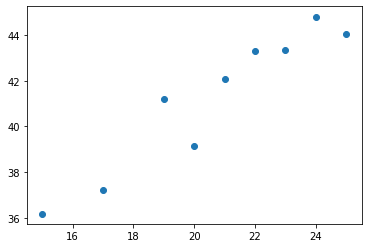

In [158]:
plt.scatter(tumor_values.index, tumor_values.values)
plt.title("Weight vs Average Tumor Volume on Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [168]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [172]:
regress = linregress(tumor_values.index, tumor_values.values)
corr = regress.rvalue
corr

0.9505243961855268

In [174]:
regress_vals = tumor_values.index * regress.slope + regress.intercept

Float64Index([ 36.18581912960283,  37.97536434907096,  39.76490956853908,
              40.659682178273144, 41.554454788007206, 42.449227397741275,
              43.344000007475344, 44.238772617209406,  45.13354522694347],
             dtype='float64', name='Weight (g)')

In [175]:
regress_eq = "y = " + str(round(regress.slope,2)) + "x + " + str(round(regress.intercept,2))
regress_eq

'y = 0.89x + 22.76'

The r-squared is: 0.9034966277438602


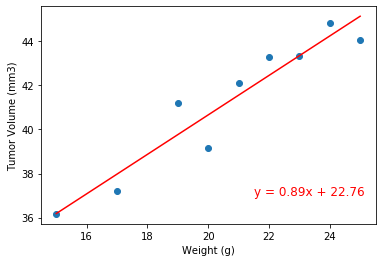

In [179]:
plt.scatter(tumor_values.index, tumor_values.values)
plt.plot(tumor_values.index,regress_vals,"r-")
plt.annotate(regress_eq,(21.5,37),fontsize=12,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {corr**2}")
plt.show()